In [ ]:
# EXERCISE SHEET 2: EXERCISE 5

Download the Wikibooks edits (de) and the US power grid networks from http://konect.cc/networks/.
The former is the bipartite edit network of the German Wikibooks. It contains users and
pages from the German Wikibooks, connected by edit events. Each edge represents an
edit. The latter represents the power grid of the US

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import random

In [2]:
#This helper function allows to create an edgelist for the Wikibooks edits (de) network.

edge_list = []
with open("./edit-dewikibooks/out.edit-dewikibooks", mode='r') as fopen:
    for line in fopen:
        if not line.startswith('%'):
            user = line.split()[0] # 1st column is the user id
            article = line.split()[1] # 2nd column is the article id
            edge_list.append(('u'+user, 'a' + article))



G = nx.Graph()
G.add_edges_from(edge_list)

H = nx.read_edgelist('opsahl-powergrid/out.opsahl-powergrid', comments = '%', nodetype=int)

For each of the following questions, compute the requested values for both networks and
add a succinct explanation on what do you think can explain the difference or similarity
between the two values.

# QUESTION 1
For each network give their number of nodes and edges, their density and
their average degree.


# Answer 1

In [3]:
number_nodes_wiki = G.number_of_nodes()
number_nodes_us = H.number_of_nodes()
number_edges_wiki = G.number_of_edges()
number_edges_us = H.number_of_edges()
average_wiki = (2 * number_edges_wiki) / number_nodes_wiki
average_us = (2 * number_edges_us) / number_nodes_us
density_wiki = (average_wiki) / (number_nodes_wiki - 1)
density_us = (average_us) / (number_nodes_us - 1)
print(f"Number of nodes of wiki: {number_nodes_wiki}")
print(f"Number of nodes of  US power grid : {number_nodes_us}")
print(f"Number of nodes of wiki: {number_edges_wiki}")
print(f"Number of nodes of  US power grid : {number_edges_us}")
print(f"Density of wiki: {density_wiki}")
print(f"Density of  US power grid : {density_us}")
print(f"Average degree of wiki: {average_wiki}")
print(f"Average degree of  US power grid : {average_us}")

Number of nodes of wiki: 75507
Number of nodes of  US power grid : 4941
Number of nodes of wiki: 167880
Number of nodes of  US power grid : 6594
Density of wiki: 5.889253883595384e-05
Density of  US power grid : 0.0005403026973346215
Average degree of wiki: 4.4467400373475305
Average degree of  US power grid : 2.66909532483303


# QUESTION 2
What are the sizes of the largest and second largest connected components
of both networks?

# Answer 2

In [4]:
largest_G = len(max(nx.connected_components(G), key=len))
largest_H = len(max(nx.connected_components(H), key=len))
sorted_G = sorted(list(nx.connected_components(G)))
sorted_H = sorted(list(nx.connected_components(H)))

print(f"The number of connected components of Wiki: {nx.number_connected_components(G)}")
print(f"The number of connected components of US power grid: {nx.number_connected_components(H)}")
second_G = len(sorted_G[1])

print(f"The largest connected components of Wiki: {largest_G}")
print(f"The largest connected components of US-power-grid: {largest_H}")
print(f"The second largest connected components of Wiki: {second_G}")

The number of connected components of Wiki: 660
The number of connected components of US power grid: 1
The largest connected components of Wiki: 74044
The largest connected components of US-power-grid: 4941
The second largest connected components of Wiki: 2


# QUESTION 3
What is the diameter of the US power grid network, and what is the average
shortest path length among nodes in it?


# Answer 3

In [10]:
if nx.is_connected(H):
    diameter = nx.diameter(H)
    print(f"Diameter of US Power Grid network: {diameter}")
else:
    largest_cc = max(nx.connected_components(H), key=len)
    subgraph = H.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    print(f"Graph is disconnected. Diameter of the largest connected component: {diameter}")
    
avg_shortest_path_length = nx.average_shortest_path_length(H)
print(f"Average shortest path length of the largest connected component: {avg_shortest_path_length}")

Diameter of US Power Grid network: 46
Average shortest path length of the largest connected component: 18.989185424445708


# QUESTION 4

Given the German Wikibooks’ network size, computing the average shortest path
length of its largest component with the Networkx built-in function is too time-
consuming. Instead, try to estimate this quantity by sampling 1000 pairs of nodes
in the largest connected component, computing the shortest path length between
them, and averaging the results. Do the same for the US power grid network; you
should obtain a value close to the one found in the previous question.

You can ```import random``` and use the function ```random.sample(node_list, 2)``` where node_list contains a list of nodes
 to draw two nodes at random from the list.


In [11]:
random.seed(0) #Random seeds gurantee reproducability when using pseudo-randomic functions, e.g. random.sample()
G_largest_cc = max(nx.connected_components(G), key=len)
G_subgraph = G.subgraph(G_largest_cc)

H_largest_cc = max(nx.connected_components(H), key=len)
H_subgraph = H.subgraph(H_largest_cc)
def estimate_avg_shortest_path_length(graph, samples=1000):
    node_list = list(graph.nodes())
    path_lengths = []
    
    for _ in range(samples):
        node_pair = random.sample(node_list, 2)
        path_length = nx.shortest_path_length(graph, source=node_pair[0], target=node_pair[1])
        path_lengths.append(path_length)
        
    return sum(path_lengths) / len(path_lengths)
avg_path_length_wiki = estimate_avg_shortest_path_length(G_subgraph)
avg_path_length_us_power_grid = estimate_avg_shortest_path_length(H_subgraph)

avg_path_length_wiki, avg_path_length_us_power_grid


(4.158, 18.718)

# QUESTION 5
Plot the histograms of the degrees distribution (PDF) on a lin-lin and log-log
scale for both networks

# Answer 5

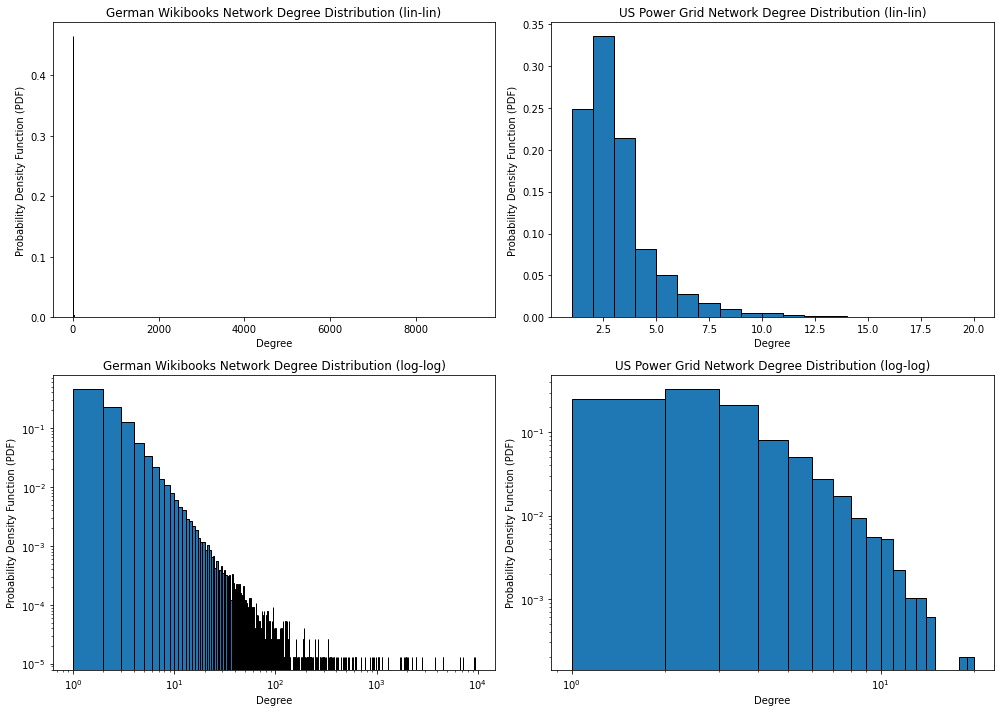

In [15]:
degrees_G = [d for n, d in G.degree()]
degrees_H = [d for n, d in H.degree()]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].hist(degrees_G, bins=range(1, max(degrees_G) + 2), density=True, edgecolor='black')
axes[0, 0].set_title("German Wikibooks Network Degree Distribution (lin-lin)")
axes[0, 0].set_xlabel("Degree")
axes[0, 0].set_ylabel("Probability Density Function (PDF)")
axes[0, 1].hist(degrees_H, bins=range(1, max(degrees_H) + 2), density=True, edgecolor='black')
axes[0, 1].set_title("US Power Grid Network Degree Distribution (lin-lin)")
axes[0, 1].set_xlabel("Degree")
axes[0, 1].set_ylabel("Probability Density Function (PDF)")
axes[1, 0].hist(degrees_G, bins=range(1, max(degrees_G) + 2), density=True, edgecolor='black', log=True)
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title("German Wikibooks Network Degree Distribution (log-log)")
axes[1, 0].set_xlabel("Degree")
axes[1, 0].set_ylabel("Probability Density Function (PDF)")
axes[1, 1].hist(degrees_H, bins=range(1, max(degrees_H) + 2), density=True, edgecolor='black', log=True)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("US Power Grid Network Degree Distribution (log-log)")
axes[1, 1].set_xlabel("Degree")
axes[1, 1].set_ylabel("Probability Density Function (PDF)")
plt.tight_layout()
plt.show()

# QUESTION 6
The value of the empirical CCDF at $k$ is defined as the number of elements in the sample larger or equal to $k$, normalized by the total number of elements. We can easily compute it without having to bin the data by reordering the samples and ploting their index position as a function of their value, for example with:

```python
def compute_CCDF(data, normalize=True):
    x = np.sort(data)[::-1]
    counts = x.size - np.searchsorted(x[::-1],x[::-1],side='left') # we need searchsorted to take into account duplicated values
    if normalize:
        counts = np.true_divide(counts, counts[-1])
    return x[::-1], counts
```

Plot the complementary cumulative distribution (CCDF) of the degrees on
a lin-lin scale and on a log-log scale for both networks.

# Answer 6

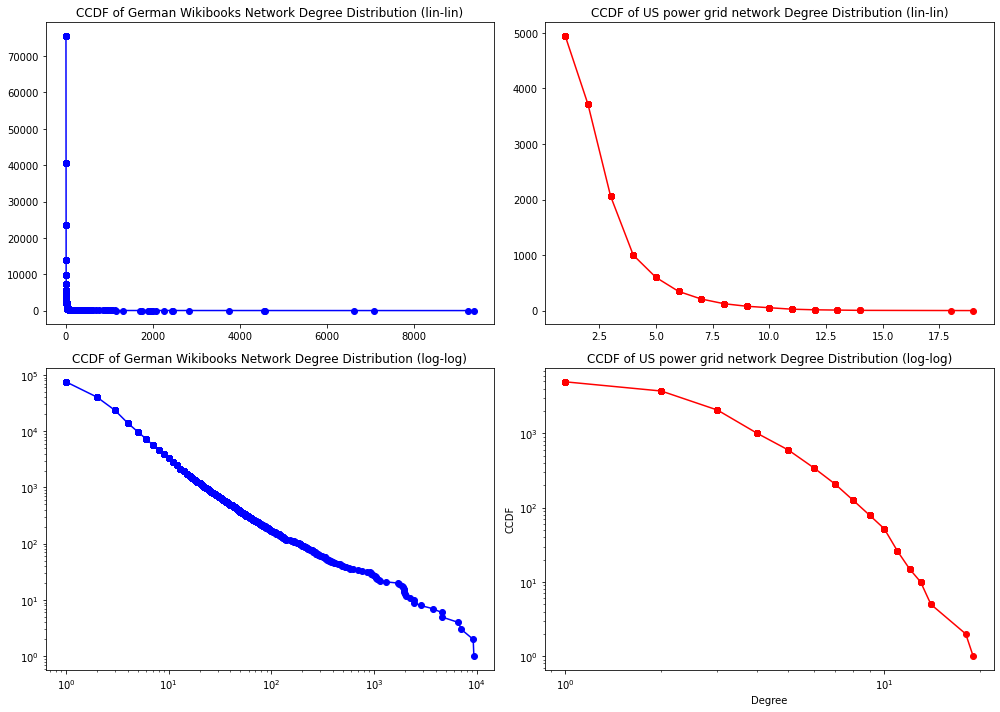

In [24]:
def compute_CCDF(data, normalize=True):
    x = np.sort(data)[::-1]
    counts = x.size - np.searchsorted(x[::-1],x[::-1],side='left') # we need searchsorted to take into account duplicated values
    if normalize:
        counts = np.true_divide(counts, counts[-1])
    return x[::-1], counts
x_G, ccdf_G = compute_CCDF(degrees_G)
x_H, ccdf_H = compute_CCDF(degrees_H)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].plot(x_G, ccdf_G, marker='o', linestyle='-', color='blue')
axes[0, 0].set_title("CCDF of German Wikibooks Network Degree Distribution (lin-lin)")
plt.xlabel('Degree')
plt.ylabel('CCDF')
axes[0, 1].plot(x_H, ccdf_H, marker='o', linestyle='-', color='red')
axes[0, 1].set_title("CCDF of US power grid network Degree Distribution (lin-lin)")
plt.xlabel('Degree')
plt.ylabel('CCDF')
axes[1, 0].plot(x_G, ccdf_G, marker='o', linestyle='-', color='blue')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title("CCDF of German Wikibooks Network Degree Distribution (log-log)")
plt.xlabel('Degree')
plt.ylabel('CCDF')
axes[1, 1].plot(x_H, ccdf_H, marker='o', linestyle='-', color='red')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("CCDF of US power grid network Degree Distribution (log-log)")
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.tight_layout()
plt.show()

# QUESTION 7
One of these networks
is approximately scale-free; the other is not. Which is which and how can you tell?

# Answer 7


CCDF of the German Wikibooks Network's degree distribution appears as a straight line on a log-log plot, which strongly suggests that the degree distribution of the network follows a power-law.

# QUESTION 8
For the scale-free
network give an estimate of the exponent of the degree distribution

# Answer 8

# QUESTION 9
For both networks, only by looking at the CCDF, what is the value of the
degree k for which 90% of the nodes have a degree smaller than k? What about for
99% of the nodes?

# Answer 9

# QUESTION 10

Finally, open the datasets with Gephi. You can run gephi by entering the command gephi in a terminal of the IMATH servers (from a thinlinc client), or you can install it on your computer.Try different layouts and visualizations. You can also detect the connected components in the "Statistics" panel and display them with different colors in the "Appearance" panel (Nodes > Partition> Component ID)